## K-means Clustering of Stock OHLC data
### Prathish Murugan 

### Refer goodnotes section for detailed observations

In quantitative finance finding groups of similar assets, or regimes in asset price series is extremely useful. It can aid in the development of filters, or entry and exit rules. This helps improve profitability for certain trading strategies.

K-Means Clustering is an unsupervised algorithm and it will be applied to daily "bar" data–open, high, low, close–in order to identify separate "candlestick" clusters. 

The goal of K-Means Clustering is to minimize the Within-Cluster Variation (WCV), also known as the Within-Cluster Sum of Squares (WCSS). This concept represents the sum across clusters of the sum of distances to each point in the cluster to its mean. That is, it measures how much observations within a cluster differ from each other. 

The nature of the K-Means algorithm is such that it is forced to generate k clusters, even if the data is highly noisy. This has the obvious implication that such "clusters" are not truly separate distributions of data but are really artifacts of a noisy dataset. Outliers such as flash crashes can impact the k.

For those who are interested in delving deeper into unsupervised clustering, the following methods should be considered:

Gaussian Mixture Models/Expectation-Maximisation Algorithm
DBSCAN and OPTICS algorithms
Deep Neural Network Architectures: Autoencoders and Restricted Boltzmann Machines

Attention will now turn towards simulating data and fitting the K-Means algorithm to it.

In [3]:
import itertools  # used to chain lists of lists together when generating the random sample data
import numpy as np
import matplotlib. pyplot as plt
from sklearn. cluster import KMeans

## Inside Main --> if __name__ == "__main__"

In [4]:
# This is inside main !!!

#Here basically you are creating 3 different multivariate normal distribution points as 3 different lists and joining all these list 
# into a single list. So when you visualise the final list you can clearly see 3 different clusters as they are different distributions
# based on 3 different mean coordinates and covariance matrix you give for each distribution

np.random.seed(1)     #This is for reciprocating the code. You will get the same random numbers if you set the random seed.

# Set the number of samples, the means, and variances of each of the three simulated clusters
samples = 100
mu = [(7, 5), (8, 12), (1, 10)]    # It's the mean. For ex, (7,5) is the mean point on 2d coordinate for one cluster.
cov = [
        [[0.5, 0], [0, 1.0]],
        [[2.0, 0], [0, 3.5]],
        [[3, 0], [0, 5]],
    ]                              #Kinda like correlation. Each cluster's covariance is a 2*2 matrix. 
                                   #Watch this https://www.youtube.com/watch?v=152tSYtiQbw

In [22]:
#Example of how this works
x = np.random.multivariate_normal((3,7), [[1, 0.5], [0.5, 1]],100)
x

array([[4.34896067, 5.91645215],
       [2.72208882, 6.3980565 ],
       [4.74434176, 7.8729197 ],
       [3.44459016, 8.05333924],
       [1.75623195, 7.27098233],
       [3.11470535, 5.76305596],
       [3.65504836, 8.78577371],
       [1.762084  , 5.5243359 ],
       [3.26850806, 5.76361677],
       [5.27049746, 8.09647379],
       [3.57002166, 7.04864528],
       [3.44479184, 6.95377741],
       [1.69793448, 7.12548143],
       [1.95365333, 7.98365082],
       [3.81196229, 7.2868589 ],
       [2.84161131, 6.48681255],
       [2.30119675, 5.66008894],
       [1.7574259 , 5.95160092],
       [1.01031017, 4.54619527],
       [3.10271216, 7.24836398],
       [4.58769306, 9.18995819],
       [2.52891587, 6.63823423],
       [5.1107665 , 7.56420546],
       [1.90438412, 7.0795628 ],
       [2.06687389, 5.17143236],
       [4.02866668, 7.75672788],
       [5.00549808, 8.41656691],
       [1.44502728, 7.07962979],
       [1.93796746, 7.57852111],
       [2.54849164, 6.73985556],
       [3.

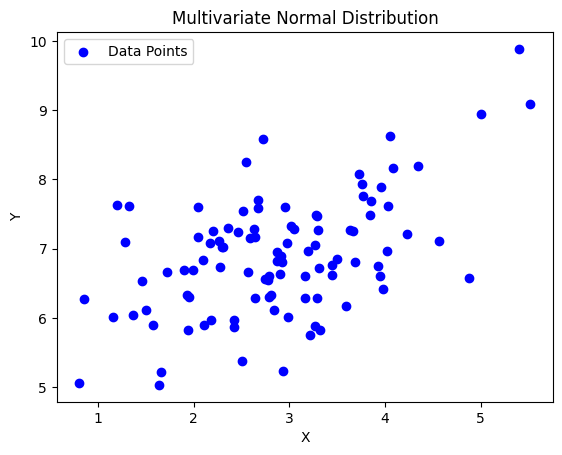

In [21]:
a = x[:, 0]
y = x[:, 1]

# Create a scatter plot
plt.scatter(a, y, c='b', marker='o', label='Data Points')

# Set plot labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Multivariate Normal Distribution')

# Add legend
plt.legend()

# Display the plot
plt.show()

In [23]:
# Generate a list of the 2D cluster points
norm_dists = [
    np.random.multivariate_normal(m, c, samples) 
    for m, c in zip(mu, cov)
]
norm_dists        #This list will have 3 different multivariate normal distributions in a nested format, see the output

[array([[7.45544747, 4.46096742],
        [6.93888697, 5.18363357],
        [7.810293  , 4.78601222],
        [6.6119675 , 7.23027415],
        [8.36386778, 5.56890409],
        [6.5143367 , 6.07905705],
        [6.57717239, 4.56931937],
        [6.55883244, 4.08655659],
        [6.58490781, 5.26187548],
        [7.08715477, 5.87619986],
        [7.62656019, 4.60287432],
        [7.18728969, 5.31897183],
        [7.40535989, 6.04003845],
        [7.66295139, 4.89110153],
        [9.06284881, 5.3093178 ],
        [7.81544446, 6.0986885 ],
        [7.05645513, 6.29099337],
        [7.01651591, 6.31289541],
        [6.60120135, 4.1688266 ],
        [5.89612154, 5.52795055],
        [6.48497872, 5.20835292],
        [6.47237551, 5.71821638],
        [7.54292941, 6.87230326],
        [8.24363066, 3.73114104],
        [6.48559671, 4.77274749],
        [7.4014703 , 3.97620068],
        [6.59099037, 6.50452187],
        [6.19411034, 4.00237916],
        [8.18138396, 6.49640531],
        [7.380

In [25]:
X = np.array(list(itertools.chain(*norm_dists)))
X

array([[ 7.45544747e+00,  4.46096742e+00],
       [ 6.93888697e+00,  5.18363357e+00],
       [ 7.81029300e+00,  4.78601222e+00],
       [ 6.61196750e+00,  7.23027415e+00],
       [ 8.36386778e+00,  5.56890409e+00],
       [ 6.51433670e+00,  6.07905705e+00],
       [ 6.57717239e+00,  4.56931937e+00],
       [ 6.55883244e+00,  4.08655659e+00],
       [ 6.58490781e+00,  5.26187548e+00],
       [ 7.08715477e+00,  5.87619986e+00],
       [ 7.62656019e+00,  4.60287432e+00],
       [ 7.18728969e+00,  5.31897183e+00],
       [ 7.40535989e+00,  6.04003845e+00],
       [ 7.66295139e+00,  4.89110153e+00],
       [ 9.06284881e+00,  5.30931780e+00],
       [ 7.81544446e+00,  6.09868850e+00],
       [ 7.05645513e+00,  6.29099337e+00],
       [ 7.01651591e+00,  6.31289541e+00],
       [ 6.60120135e+00,  4.16882660e+00],
       [ 5.89612154e+00,  5.52795055e+00],
       [ 6.48497872e+00,  5.20835292e+00],
       [ 6.47237551e+00,  5.71821638e+00],
       [ 7.54292941e+00,  6.87230326e+00],
       [ 8.

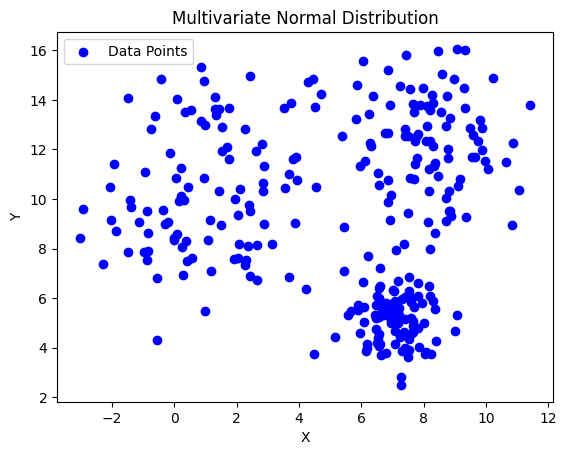

In [26]:
a = X[:, 0]
y = X[:, 1]

# Create a scatter plot
plt.scatter(a, y, c='b', marker='o', label='Data Points')

# Set plot labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Multivariate Normal Distribution')

# Add legend
plt.legend()

# Display the plot
plt.show()

Now you can see 3 different clusters, so basically we were generating the points for this scatter plot, but we were mindful that these cluster points must be in multivariate normal distribution.



Now let's call the K-means with a k=3 and another case with k=4. 


Initializing the KMeans class with the n_clusters parameter, representing the number of clusters to find, and then calling the fit method on the observational data.

In [27]:
# Apply the K-Means Algorithm for k=3, which is
# equal to the number of true Gaussian clusters

km3 = KMeans(n_clusters=3)        #creates an instance of the KMeans class
km3.fit(X)                        #The K-Means algorithm will attempt to partition the data points into three clusters based on 
                                  #their similarity and the minimization of the within-cluster sum of squared distances.
km3_labels = km3.labels_          #extracts the cluster assignments (labels) for each data point. 
                                  #These labels indicate which cluster each data point belongs to. Like 0,1 or 2, since k=3. 

/Users/pratishmurugan/miniforge3/envs/OHLCkmeans/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [31]:
km3_labels       #300 data points have been found according clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1], d

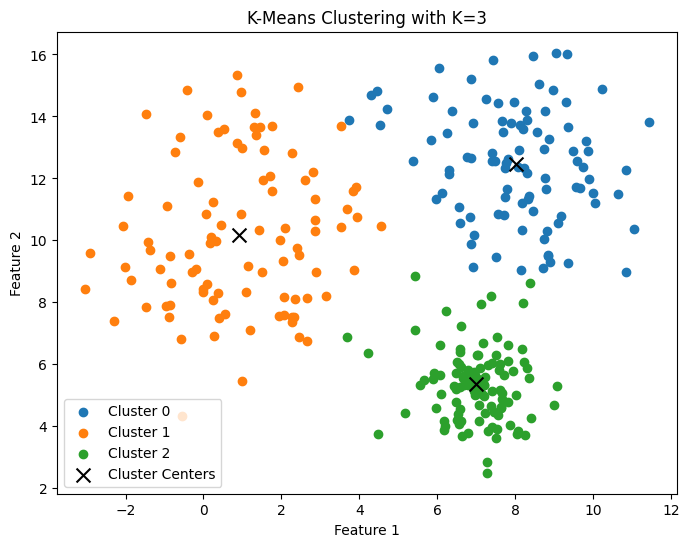

In [32]:
#Taken from ChatGPT 
# Visualize the data points and their assigned labels
plt.figure(figsize=(8, 6))

# Plot the data points with assigned labels in different colors
for label in np.unique(km3_labels):
    plt.scatter(
        X[km3_labels == label, 0], X[km3_labels == label, 1], label=f'Cluster {label}'
    )

# Plot the cluster centers
plt.scatter(
    km3.cluster_centers_[:, 0],
    km3.cluster_centers_[:, 1],
    c='black',
    marker='x',
    s=100,
    label='Cluster Centers',
)

# Set plot labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering with K=3')

# Add legend
plt.legend()

# Display the plot
plt.show()


In [33]:
#Same for k=4
# Apply the K-Means Algorithm for k=4, which is
# larger than the number of true Gaussian clusters
km4 = KMeans(n_clusters=4)
km4.fit(X)
km4_labels = km4.labels_

/Users/pratishmurugan/miniforge3/envs/OHLCkmeans/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


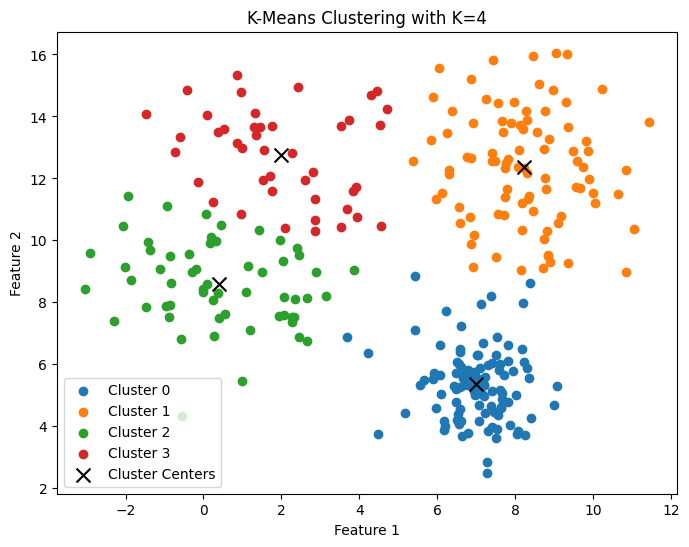

In [37]:
#Taken form CHATGPT
# Visualize the data points and their assigned labels
plt.figure(figsize=(8, 6))

# Plot the data points with assigned labels in different colors
for label in np.unique(km4_labels):
    plt.scatter(
        X[km4_labels == label, 0], X[km4_labels == label, 1], label=f'Cluster {label}'
    )

# Plot the cluster centers
plt.scatter(
    km4.cluster_centers_[:, 0],
    km4.cluster_centers_[:, 1],
    c='black',
    marker='x',
    s=100,
    label='Cluster Centers',
)

# Set plot labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering with K=4')

# Add legend
plt.legend()

# Display the plot
plt.show()


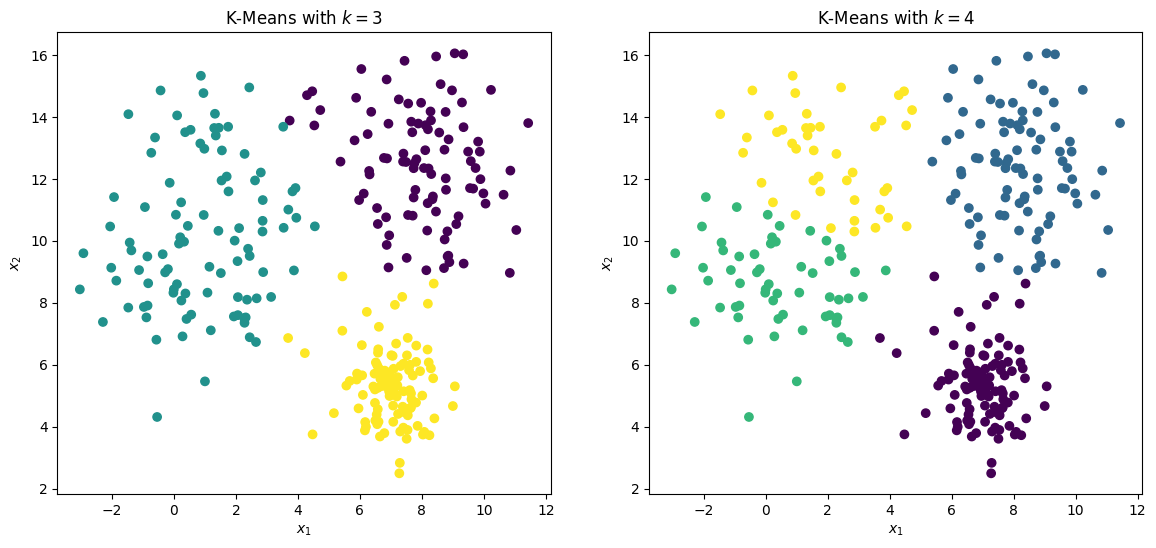

In [40]:
# Create a subplot comparing k=3 and k=4 
# for the K-Means Algorithm
np.float = float    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))
ax1.scatter(X[:, 0], X[:, 1], c=km3_labels.astype(np.float))
ax1.set_xlabel("$x_1$")
ax1.set_ylabel("$x_2$")
ax1.set_title("K-Means with $k=3$")
ax2.scatter(X[:, 0], X[:, 1], c=km4_labels.astype(np.float))
ax2.set_xlabel("$x_1$")
ax2.set_ylabel("$x_2$")
ax2.set_title("K-Means with $k=4$")
plt.show()

### Comments

The full two-dimensional set of data was generated by sampling from three separate Gaussian distributions with differing means and variances. It is immediately apparent that the choice of "k" when carrying out the K-Means algorithm is important for the interpretation of results.

In the left subplot the algorithm is forced to choose three clusters. It has largely captured the three separate Gaussian clusters, assigning blue, red and green colours to each.

The K-Means algorithm is a hard clustering tool. That is, it creates a distinct "hard" boundary between cluster membership, rather than probabalistically assigning membership as in a "soft" cluster algorithm.

In the right subplot the algorithm is forced to choose four clusters and has divided the true grouping on the left hand side of the plot into two separate regions (yellow and red). However it is known that this cluster was generated from a single Gaussian distribution and hence the algorithm has "incorrectly" assigned the data. The remaining clusters on the right hand side are "correctly" identified however.

The choice of "k" has significant implications for the usefulness of the algorithm–particularly with regard to quantitative trading applications.

Refer to the [OHLC_Kmeans Notebook](http://localhost:8888/notebooks/OHLC_Kmeans.ipynb%20) for the OHLC clustering 